# Neural Population

## Homogeneous populations

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from random import gauss
from random import randint
from random import random
import scipy.sparse as sparse
import scipy.stats as stats

In [14]:
def population_activity(I_init, rm, Cm, num, typeofconnect, prob_fixnum):
  U_rest = -0.065                
  U_reset = -0.065
  thresh = -0.050                      
  tau = Cm*rm
  
  T = 0.100 #total simulation length 
  dt = 0.00002                     
  time = np.arange(0, T+dt, dt)      
    
  
  U = np.empty((1000,len(time)))    
  U[:,0] = U_rest                      
    
  I_init = I_initial(I_init=I_init, time=time, num = num)
  I = np.zeros((1000,len(time)))
 
  spikes = np.zeros((1000,len(time)))          
  act = []
  W = weights(typeofconnect,prob_fixnum)           
  
  for i in range(len(time)):
      for j in range(1000):
            I[j][i]= I_init[i] + I[j][i]
            U[j][i] = (((U_rest - U[j][i-1]) + I[j][i]*rm)*dt)/tau + U[j][i-1]
            if U[j][i] > thresh:
                U[j][i-1] = 0.04      
                U[j][i] = U_reset     
                spikes[j][i] = time[i]  
                act.append([i,j])
                if(i < 4997):
                    add_amount = I_values(j,i,I_init,time,spikes,W)
                    I[:,i+1:i+5] = I[:,i+1:i+5] + add_amount
                
  return act , I_init

In [8]:
#compute the initial current
def I_initial(I_init = 0.005, time=None, num = 1):
    I0 = np.zeros(len(time))
    I0[0:4999] = I_init
    I1 = []
    I2 = []

    #Setting the initial current_ I1 
    for i in range(0, len(time)):
        var = gauss(I_init, I_init*0.1)
        I1.append(var)
    
    #Setting the initial current_ I2
    for i in range(0, len(time)):
        
        var = ((math.cos(i/100)+1)/4)*((math.sin(i/300)+1)/4)*(gauss(0,0.4*I_init))+I_init
        I2.append(var)
   
    I = [I0,I1,I2]
    return I[num-1]

In [9]:
#compute the effect of presynaptic neuron's spike to their postsynaptic neurons!            
def I_values(j=0, i=0, I_init = 0.05, time=None, spikes=None, W=None ,tau_I=0.001):
    exp1= (time[i+1:i+5] - spikes[j][i])/tau_I
    exp2= np.exp(1-exp1)
    exp3= exp1*exp2
    I_inp = np.dot(W[j,:].reshape(1000,1),exp3.reshape(1,4))
    return I_inp

In [10]:
#compute the weights of connectivity due to type of connectivty.
def weights(typeofconnectivity = 'full' , prob_fixnum = 1):
    
    w = np.zeros((1000,1000))
    # w>0 implies excitatory coupling
    # w<0 implies inhibitory coupling
    w[0:800,:] = abs(np.random.normal(6,4,size=(800,1000)))
    w[800:1000,:] = -1*abs(np.random.normal(6,4,size=(200,1000)))
    for i in range(1000): w[i,i]=0
        
    if( typeofconnectivity == 'full'):
        w=w/1000
        return w
    
    if( typeofconnectivity == 'randomprob'):
        A = sparse.random(1000, 1000, density=prob_fixnum, data_rvs=np.ones).toarray()
        w = w*A/(1000*prob_fixnum)
        return w
    
    if( typeofconnectivity == 'randomfix'):
        A = np.zeros((1000,1000))
        for i in range(1000):
            j = np.random.choice(list(range(1000)), prob_fixnum, replace=False)
            A[i][j] = 1
        w = w*A/100
        return w

## Population activity of neurons Simulation (excitatory (80%) and inhibitory (20%) neurons)

In [15]:
def simul_pop(I_init, rm_init, Cm_init, num, typeofconnect, prob_fixnum):
    act , I = population_activity(I_init, rm_init, Cm_init, num, typeofconnect, prob_fixnum)
    act = np.array(act)
    
    color = np.where(act[:,1]>799,'r','b')
    
    axis_color = 'lightgoldenrodyellow'
    fig = plt.figure("current", figsize=(20, 3))
    plt.title("current")
    plt.plot(np.arange(5001), I)
    plt.ylabel("Potential [V]")
    plt.xlabel("Time [s]")
    
    fig = plt.figure("Population activity of neurons", figsize=(20, 8))
    plt.title("Population activity of neurons")
    plt.scatter(act[:,0], act[:,1], marker='o', c=color , s=2)
    plt.ylabel("Number of neurons")
    plt.xlabel("Time [s]")

## Full connectivity scheme

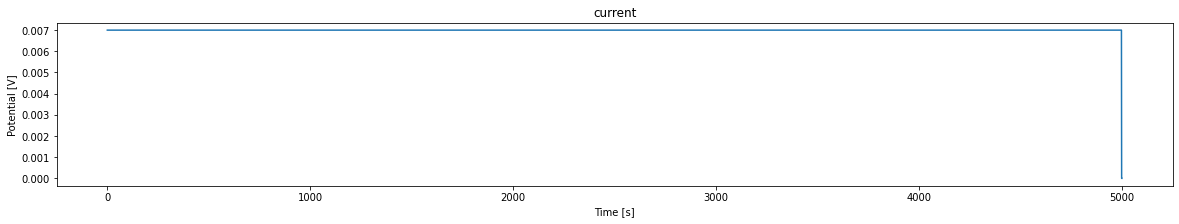

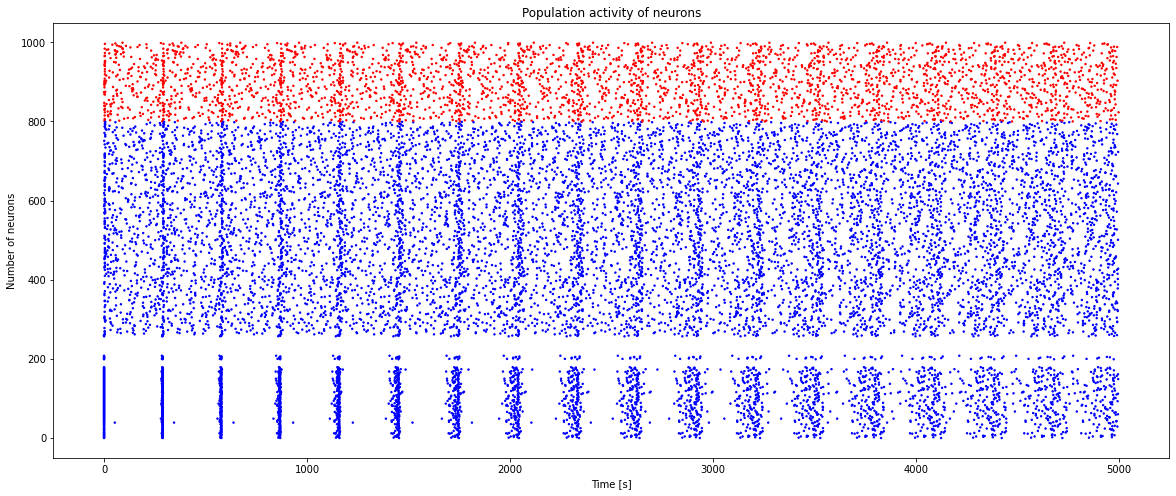

In [21]:
simul_pop(0.007 ,62.5,0.0049 , 1,'full' , 0.25)

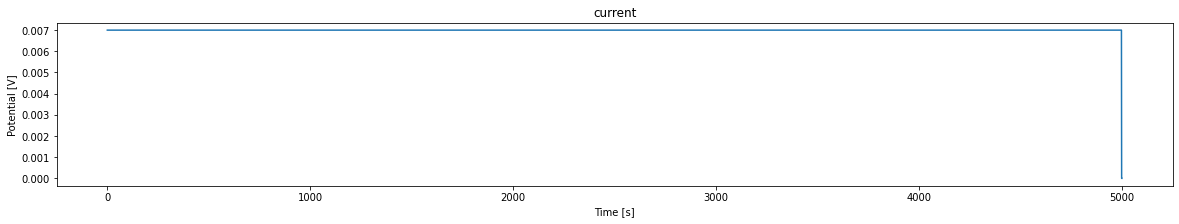

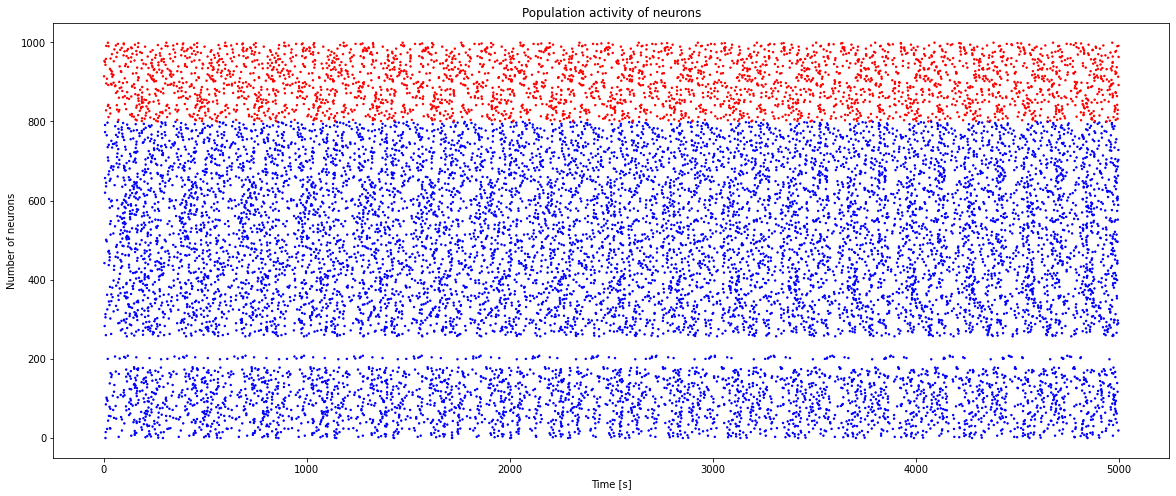

In [23]:
simul_pop(0.007 ,62.5,0.0049 , 1,'full' , 0.55)

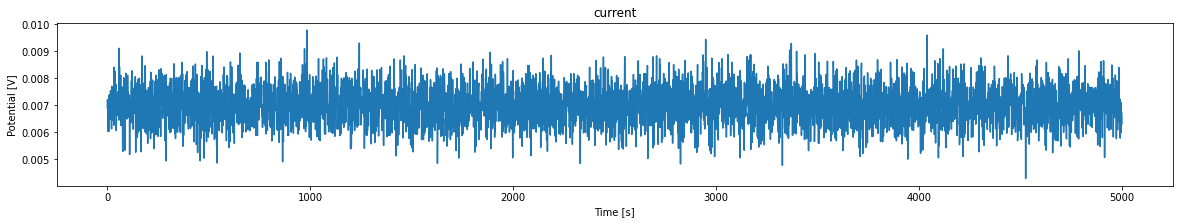

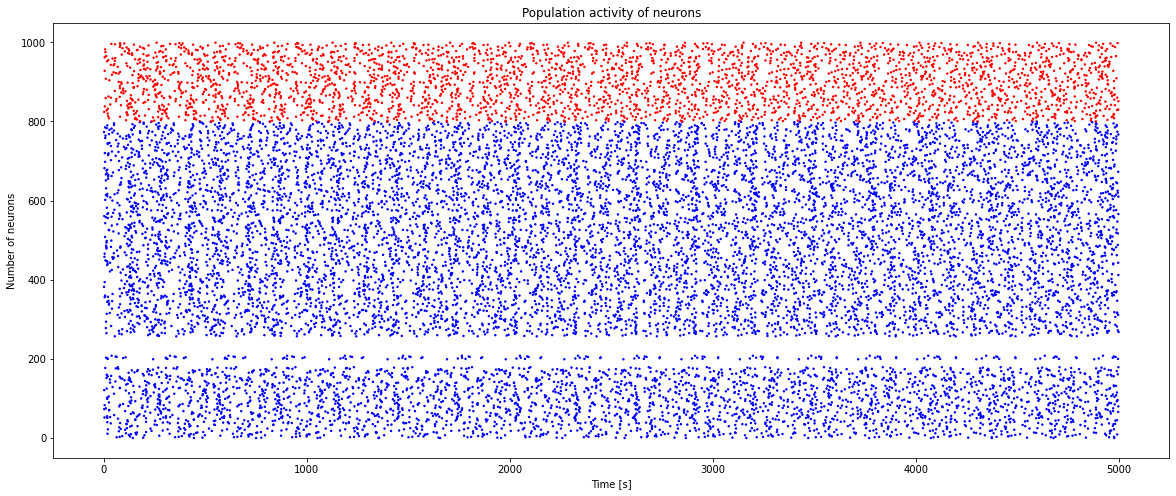

In [24]:
simul_pop(0.007 ,62.5,0.0049 , 2,'full' , 0.25)

## Random connectivity: fixed coupling probability

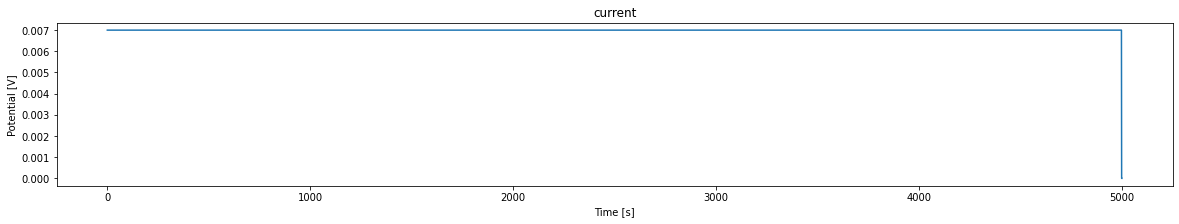

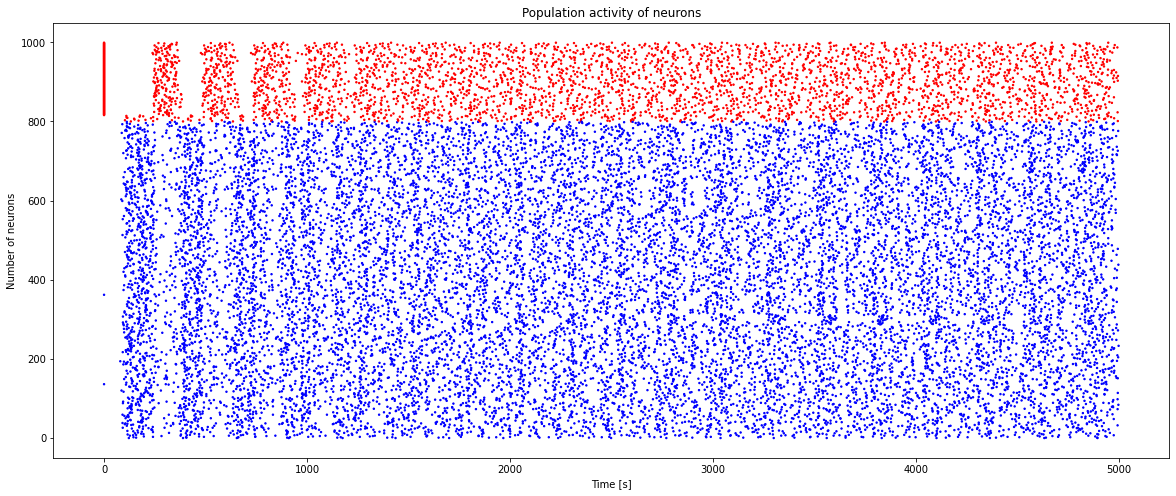

In [28]:
simul_pop(0.007 ,62.5,0.0049 ,1,'randomprob', 0.25)

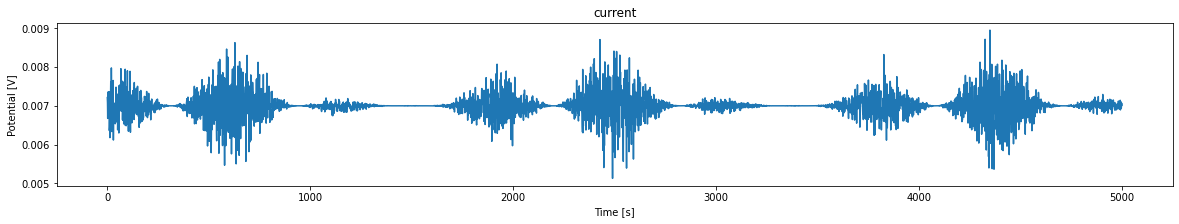

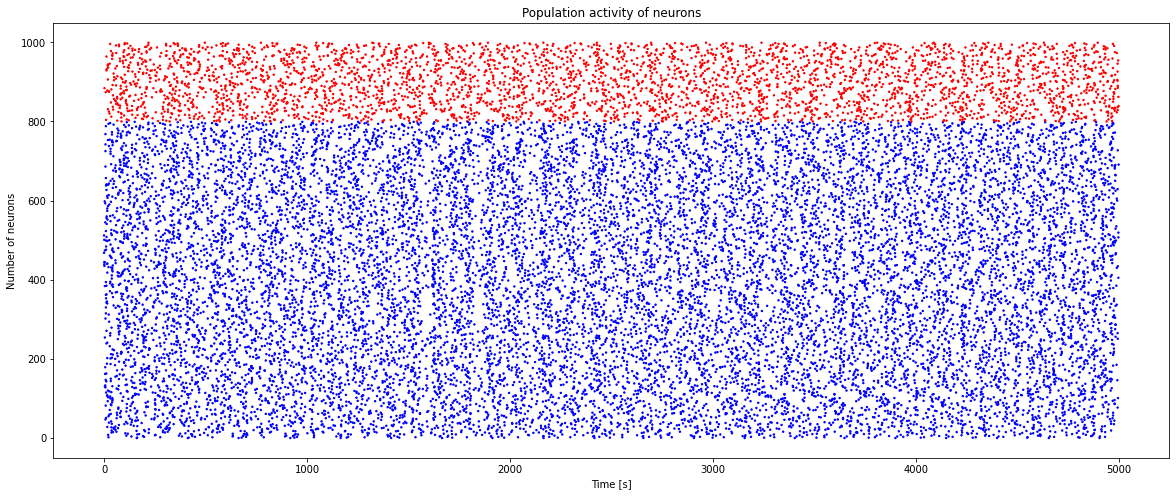

In [29]:
simul_pop(0.007 ,62.5,0.0049 ,3,'randomprob', 0.25)

## Random connectivity: fixed number of presynaptic partners

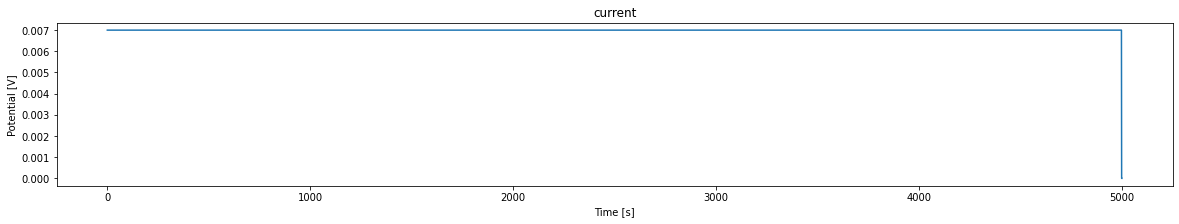

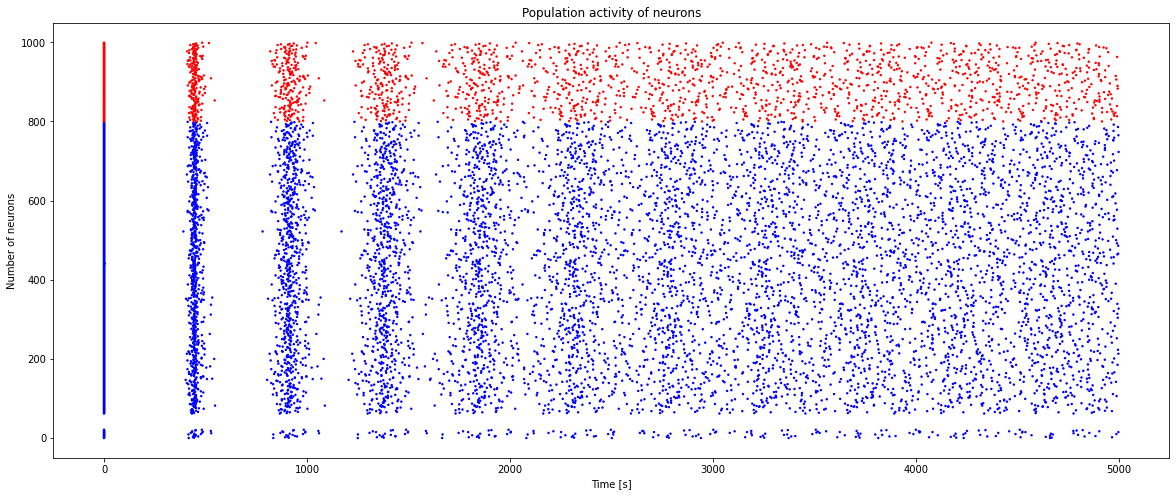

In [26]:
simul_pop(0.007 ,62.5, 0.0049, 1, 'randomfix' , 25)

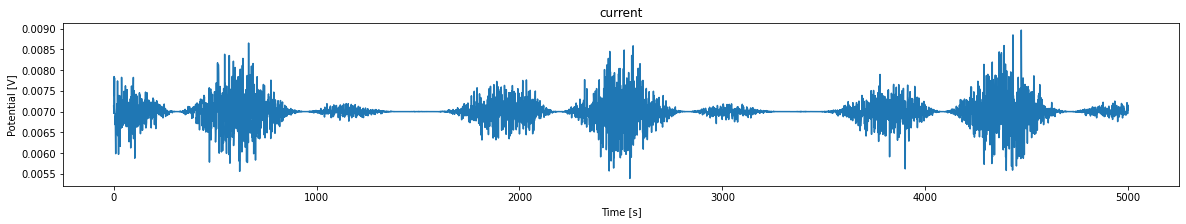

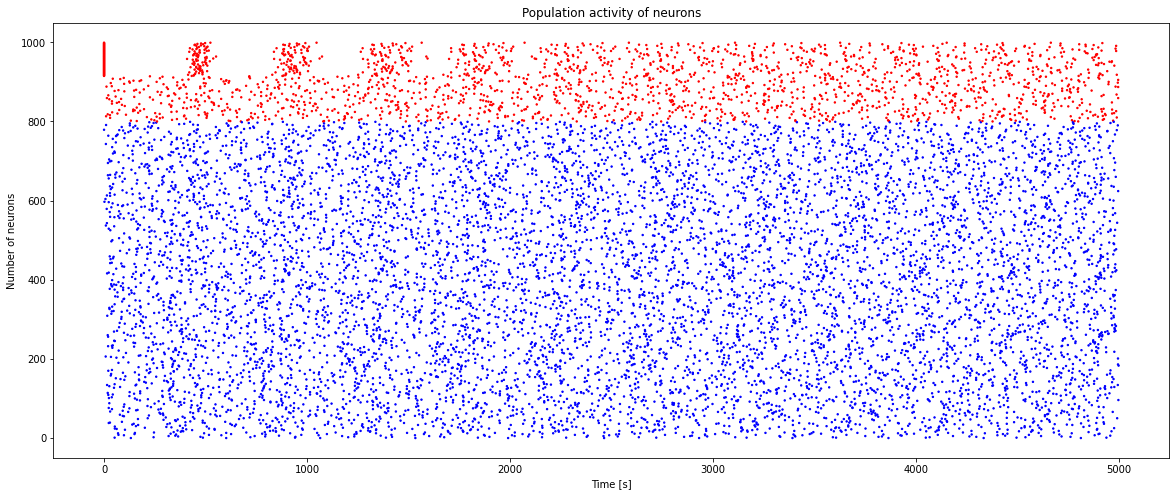

In [27]:
simul_pop(0.007 ,62.5, 0.0049, 3, 'randomfix' , 25)